In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
from sklearn.model_selection import train_test_split

N = 200

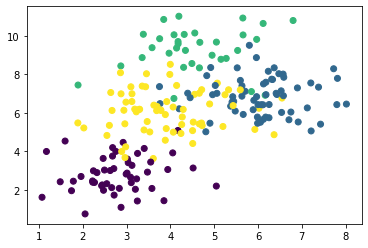

In [2]:
X, y = make_blobs(n_samples=[N//4, N//3, N//6, N//3], n_features=3, centers=[[3,3],[6,7],[5,9],[4,6]], random_state=4444)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y);

In [3]:
version1 = KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='euclidean')
version2 = KNeighborsClassifier(n_neighbors=13,weights='uniform',metric='euclidean')
version3 = KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='mahalanobis',metric_params={'V': np.cov(X), 'VI': np.linalg.inv(np.cov(X))},algorithm='brute')
version4 = KNeighborsClassifier(n_neighbors=9,weights='distance',metric='euclidean')
versions = [version1, version2, version3, version4]
names = ["version1", "version2", "version3", "version4"]


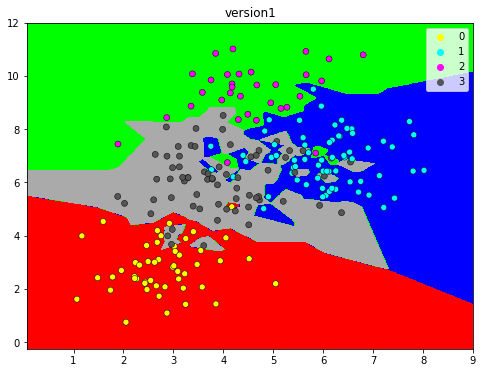

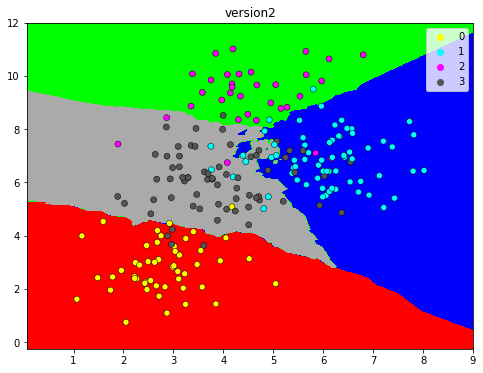

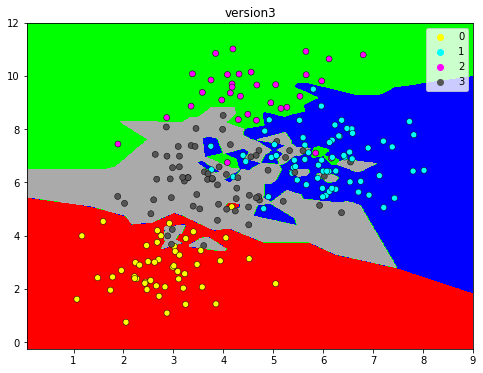

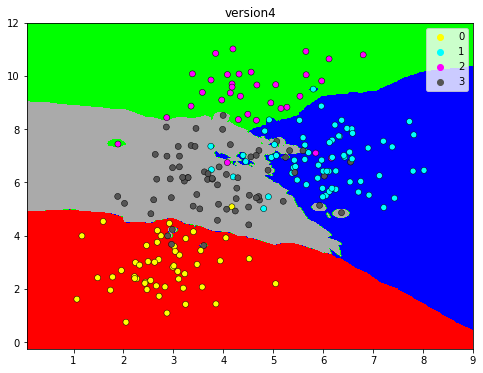

In [4]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FF0000", "#0000FF", "#00FF00", "#AAAAAA"])
cmap_bold = ['#FFFF00', '#00FFFF', '#FF00FF', '#555555']

for clf, name in zip(versions, names):
    # we create an instance of Neighbours Classifier and fit the data.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)

plt.show()

In [5]:
def test1():
    bsts = []
    for d in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        resss = []
        for k in range(1,21):
            ress = []
            for _ in range(10):
                X_train_train, X_vali, y_train_train, y_vali = train_test_split(X_train, y_train, test_size=.2)
                res = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='euclidean').fit(X_train_train, y_train_train).predict(X_vali)
                ress += [np.sum(res==y_vali)/len(y_vali)]
                assert ress[-1]<=1
            resss += [ress]
        k = np.argmax(np.mean(resss,axis=1)) + 1
        res = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='euclidean').fit(X_train, y_train).predict(X_test)
        bsts += [np.sum(res==y_test)/len(y_test)]
    return np.mean(bsts),np.std(bsts),k

In [6]:
test1()

(0.8534883720930232, 0.045393537897542156, 14)

In [7]:
def test2():
    bsts = []
    for d in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        resss = []
        for k in range(1,21):
            ress = []
            for _ in range(10):
                X_train_train, X_vali, y_train_train, y_vali = train_test_split(X_train, y_train, test_size=.2)
                res = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='euclidean').fit(X_train_train, y_train_train).predict(X_vali)
                ress += [np.sum(res==y_vali)/len(y_vali)]
                assert ress[-1]<=1
            resss += [ress]
        k = np.argmax(np.mean(resss,axis=1)) + 1
        res = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='euclidean').fit(X_train, y_train).predict(X_test)
        bsts += [np.sum(res==y_test)/len(y_test)]
    return np.mean(bsts),np.std(bsts),k

In [8]:
test2()

(0.8232558139534882, 0.029781973197362102, 20)

In [9]:
def test3():
    bsts = []
    for d in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        resss = []
        for k in range(1,21):
            ress = []
            for _ in range(10):
                X_train_train, X_vali, y_train_train, y_vali = train_test_split(X_train, y_train, test_size=.2)
                res = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='mahalanobis',metric_params={"V":np.cov(X_train_train), "VI":np.linalg.inv(np.cov(X_train_train))},algorithm='brute').fit(X_train_train, y_train_train).predict(X_vali)
                ress += [np.sum(res==y_vali)/len(y_vali)]
                assert ress[-1]<=1
            resss += [ress]
        k = np.argmax(np.mean(resss,axis=1)) + 1
        res = KNeighborsClassifier(n_neighbors=k,weights='uniform',metric='mahalanobis',metric_params={"V":np.cov(X_train), "VI":np.linalg.inv(np.cov(X_train))},algorithm='brute').fit(X_train, y_train).predict(X_test)
        bsts += [np.sum(res==y_test)/len(y_test)]
    return np.mean(bsts),np.std(bsts),k

In [10]:
test3()

(0.7511627906976744, 0.06581847301434841, 5)